In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix,roc_auc_score,roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [4]:
data= pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
data.shape

(768, 9)

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


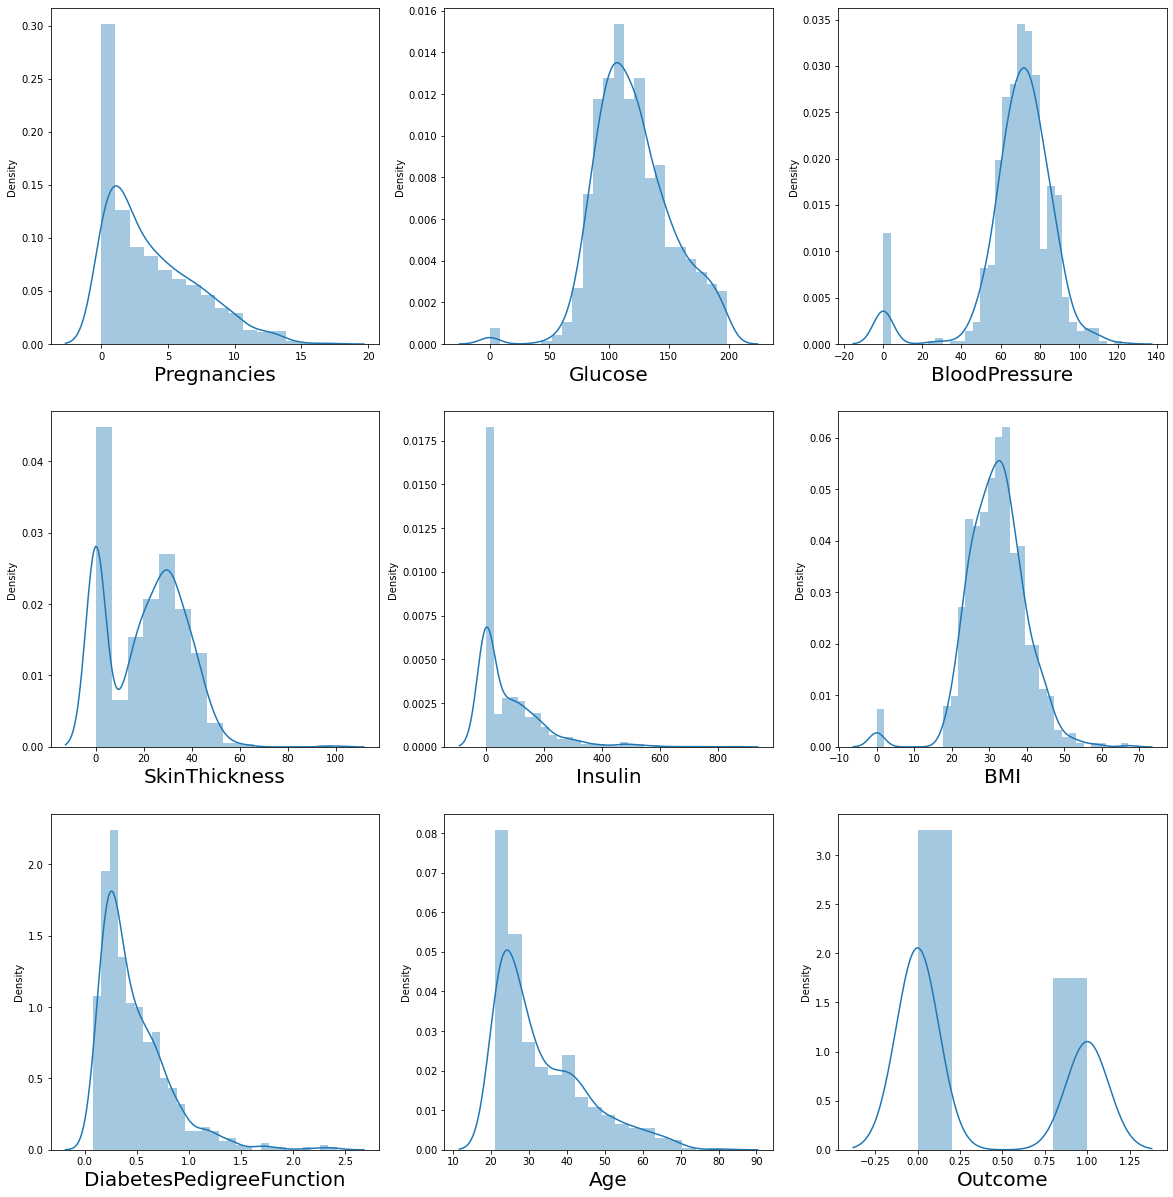

In [13]:
#lets see how data is distributed for every column
plt.figure(figsize=(20,21))
plotnumber = 1
for column in data:
    if plotnumber<=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

In [14]:
#replacing zero
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

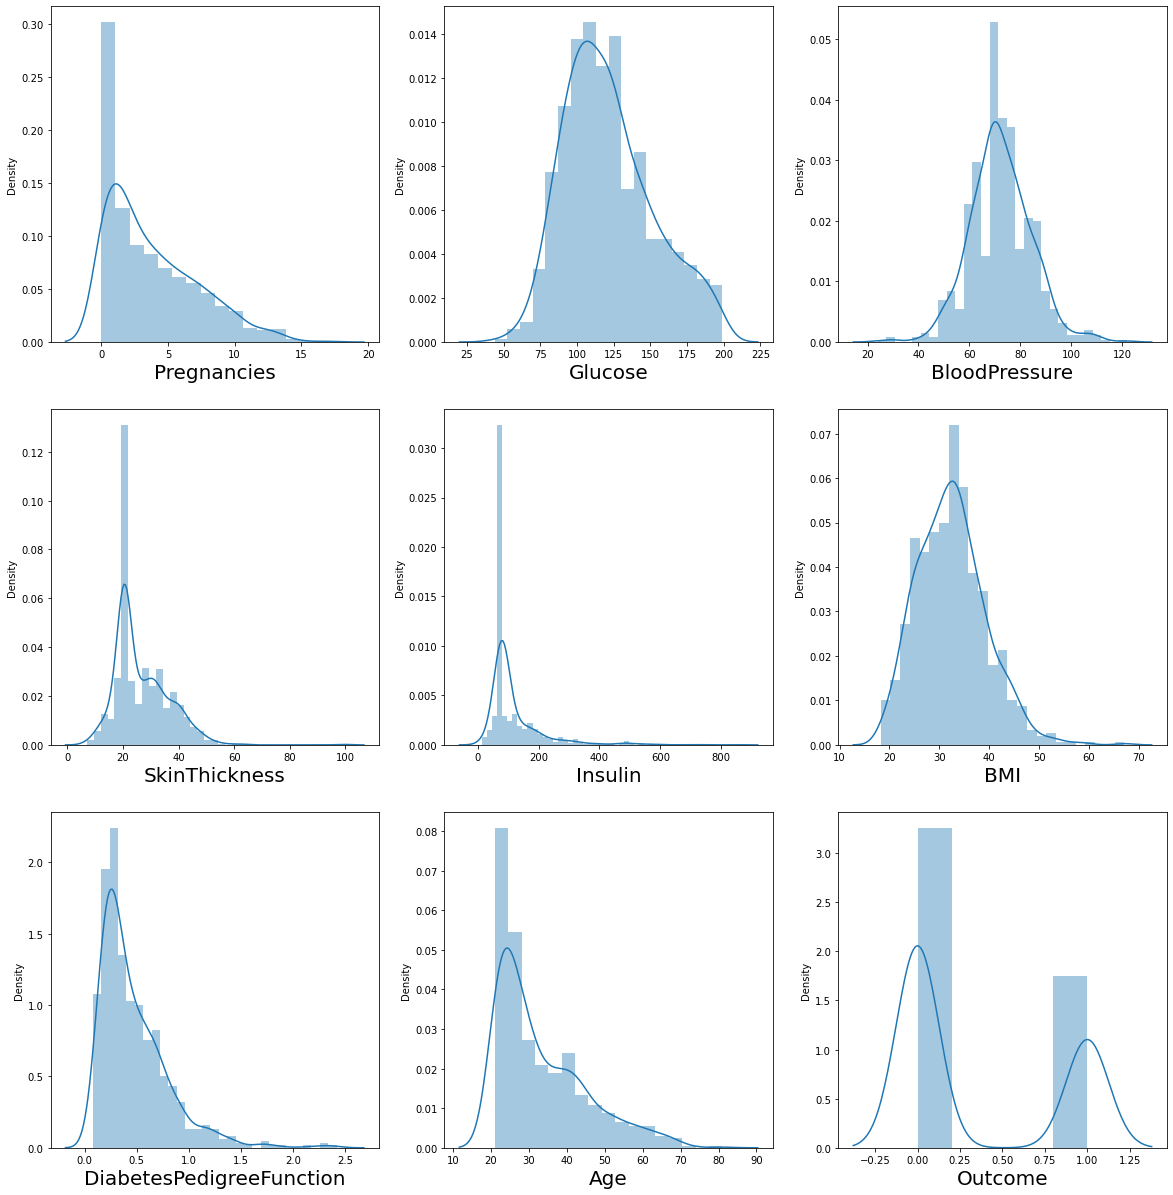

In [15]:
#lets see how data is distributed for every column
plt.figure(figsize=(20,21))
plotnumber = 1
for column in data:
    if plotnumber<=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

In [16]:
feature= data.drop('Outcome',axis=1)

KeyError: 'Outcome'

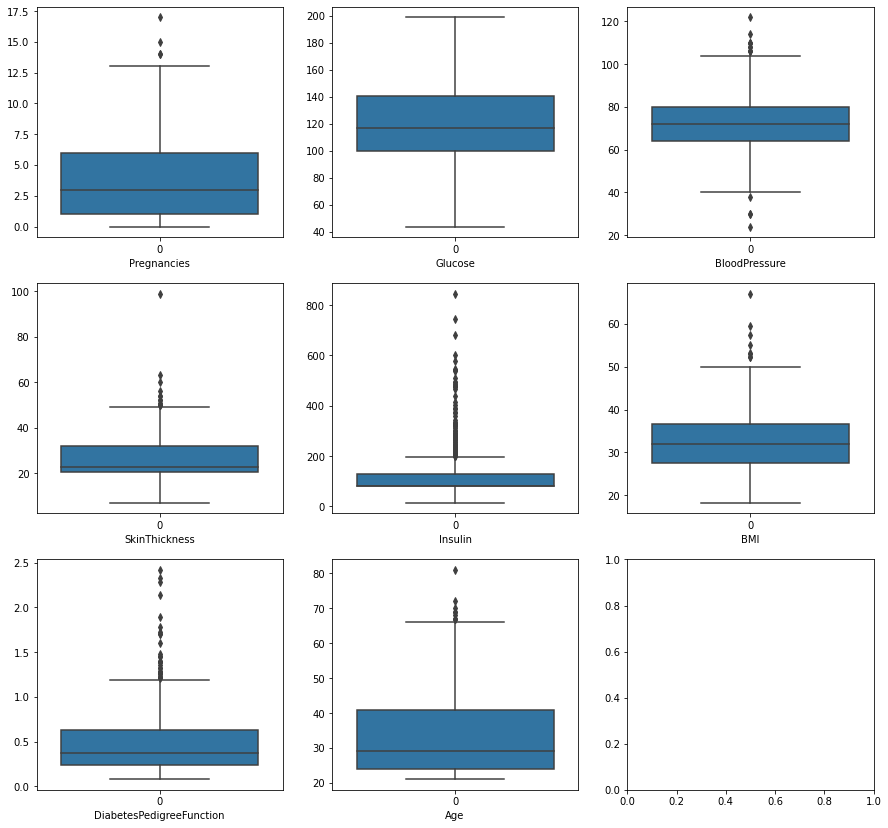

In [30]:
#lets visualise the outlier
plt.figure(figsize=(15,50))
graph = 1
for column in data:
    if graph<=30:
        ax= plt.subplot(10,3,graph)
        sns.boxplot(data=feature[column],orient='v')
        plt.xlabel(column,fontsize = 10)
    graph+=1
plt.show()

In [27]:
feature.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')